# 통계 기본 상식과 그래프

## 1. 통계 기본 상식 퀴즈

### 질문 1. 
- 동욱이는 이번 시험에서 수학은 85점, 과학은 56점, 영어는 90점을 맞았다고 합니다. 다음 중 동욱이의 점수와 관련해서 옳지 않은 것을 고르세요.
    1. 동욱이의 수학 점수는 IQR 안에 포함되어 있지 않다.
    2. 동욱이의 영어 점수는 상위 25%에 해당한다.
    3. 동욱이의 과학 점수는 IQR 안에 포함되어 있다.
    4. 동욱이의 과학 점수는 평균보다 낮다.

In [3]:
import pandas as pd

df_exam = pd.read_csv('../data-2/exam.csv')
df_exam.describe()

,math_score,science_score,english_score
count,200.000000,200.00000,200.000000
mean,52.830000,54.98750,77.547500
std,12.961912,9.42178,9.165507
min,15.000000,20.00000,25.000000
25%,45.000000,48.00000,72.000000
50%,52.500000,56.00000,78.000000
75%,60.000000,62.00000,84.000000
max,95.000000,90.00000,94.000000


In [18]:
# iqr = q3 - q1
q3 = df_exam['math_score'].quantile(0.75)
q1 = df_exam['math_score'].quantile(0.25)

iqr = q3 - q1
q1, q3, iqr

(45.0, 60.0, 15.0)

> 1. O
> - 동욱의 수학 점수는 85점으로 iqr의 범위인 45~60 사이에 해당되지 않는다.

In [19]:
df_exam['english_score'].quantile(0.75) #상위 25%

84.0

> 2. O
> - 동욱의 영어 점수는 90점으로 상위 25% 라인인 84점 보다 높기 때문에 상위 25% 이내이다. 

In [7]:
# iqr = q3 - q1


(48.0, 62.0, 14.0)

> 3. O
> - 동욱의 과학 점수는 56점으로 iqr의 범위인 48~62 사이에 해당된다.

In [20]:
df_exam['science_score'].mean()

54.9875

> 4. X
> - 동욱의 과학 점수는 56점으로 평균 54.9875 보다 높다.

### 질문 2.
- 다음 학기부터 제2외국어 수업을 시작한다고 합니다. 그래서 이번 시험이 끝나고 학생별로 어떤 외국어 과목을 희망하는지 조사를 했다고 하는데요. 학생들이 가장 많이 고른 과목은 무엇인지 영어로 써 주세요.

In [22]:
# value_counts()
df_exam.value_counts('second_lang')

second_lang
Chinese     65
Japanese    43
French      38
German      37
Russian     17
Name: count, dtype: int64

In [26]:
# 범주형 데이터를 분석할 때도, describe의 include='all' 옵션을 주면 확인할 수 있다!
df_exam.describe(include='all')

,math_score,science_score,english_score,second_lang
count,200.000000,200.00000,200.000000,200
unique,NaN,NaN,NaN,5
top,NaN,NaN,NaN,Chinese
freq,NaN,NaN,NaN,65
mean,52.830000,54.98750,77.547500,NaN
std,12.961912,9.42178,9.165507,NaN
min,15.000000,20.00000,25.000000,NaN
25%,45.000000,48.00000,72.000000,NaN
50%,52.500000,56.00000,78.000000,NaN
75%,60.000000,62.00000,84.000000,NaN


### 질문 3.
- 영어 시험 점수의 평균은 몇 점인지 소수 첫째 자리까지 반올림해서 써 주세요.

In [27]:
round(df_exam['english_score'].mean(), 1)

77.5

,math_score,science_score,english_score
count,200.000000,200.00000,200.000000
mean,52.830000,54.98750,77.547500
std,12.961912,9.42178,9.165507
min,15.000000,20.00000,25.000000
25%,45.000000,48.00000,72.000000
50%,52.500000,56.00000,78.000000
75%,60.000000,62.00000,84.000000
max,95.000000,90.00000,94.000000


### 질문 4.
- 과학 시험 점수의 중간값은 몇 점인지 써 주세요.

In [28]:
# quantile(0.5)와 같다. 단, 평균과는 다르다!
df_exam['science_score'].median()

56.0

In [29]:
df_exam.describe()

,math_score,science_score,english_score
count,200.000000,200.00000,200.000000
mean,52.830000,54.98750,77.547500
std,12.961912,9.42178,9.165507
min,15.000000,20.00000,25.000000
25%,45.000000,48.00000,72.000000
50%,52.500000,56.00000,78.000000
75%,60.000000,62.00000,84.000000
max,95.000000,90.00000,94.000000


## 2. 스타벅스 음료의 칼로리는?
> - 실습 설명
>
> 스타벅스 음료의 영양성분 데이터를 분석해 봅시다. 음료 메뉴들의 칼로리 분포를 아래와 같이 박스 플롯으로 그려 보세요!

In [4]:
import pandas as pd

starbucks_df = pd.read_csv('../data-2/starbucks.csv')
starbucks_df.head(3)

,category,beverage,option,calories,total_carbohydrates(g),total_fat(g),protein(g),cholesterol(mg),caffeine(mg)
0,Classic Espresso Drinks,Skinny Latte (Any Flavour),Grande Nonfat Milk,120,160,0.3,12.0,18,150
1,Signature Espresso Drinks,Caramel Macchiato,Grande Nonfat Milk,190,130,1.0,11.0,35,150
2,Classic Espresso Drinks,Skinny Latte (Any Flavour),Short Nonfat Milk,60,80,0.1,6.0,9,75


In [23]:
# 범주형 데이터의 간단한 기초 통계 파악
### catergory > beverage > option 이렇게 3분류로서 모두 unique한 값을 가진다.


,category,beverage,option,calories,total_carbohydrates(g),total_fat(g),protein(g),cholesterol(mg),caffeine(mg)
count,219,219,219,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
unique,9,30,13,NaN,NaN,NaN,NaN,NaN,NaN
top,Classic Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,NaN,NaN,NaN,NaN,NaN,NaN
freq,58,12,62,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,201.584475,137.374429,3.074886,7.294521,37.296804,89.520548
std,NaN,NaN,NaN,102.353614,80.605714,3.000590,4.790546,20.926664,64.726831
min,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,125.000000,80.000000,0.200000,4.000000,21.000000,50.000000
50%,NaN,NaN,NaN,190.000000,130.000000,2.500000,6.000000,36.000000,75.000000
75%,NaN,NaN,NaN,270.000000,180.000000,5.000000,10.000000,53.000000,142.500000


<Axes: >

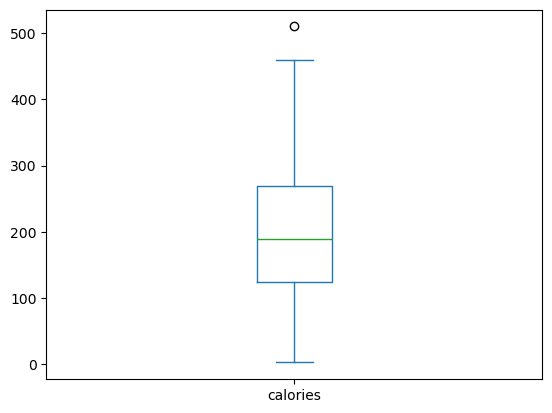

In [7]:
starbucks_df['calories'].plot(kind='box')

## 3. 중고차 데이터 분석1
> - 실습 설명
>
> 윤수는 오랜 취업 준비 끝에 중고차 거래 플랫폼에 취업했다고 합니다. 첫 업무로 현재 판매되고 있는 중고차 데이터를 분석해 보려고 하는데요. 현대자동차의 가격대 분포를 한눈에 볼 수 있도록 아래와 같이 히스토그램(막대 10개)을 그려 보세요. 채점을 위해 plt.show() 코드 없이 작성해 주세요!

In [8]:
import pandas as pd

car_df = pd.read_csv('../data-2/car.csv')
car_df

,manufacturer,category,fuel_type,engine_volume,mileage,price
0,HYUNDAI,Jeep,Petrol,2.0,36800,36065
1,TOYOTA,Sedan,Petrol,2.5,107000,15053
2,NISSAN,Jeep,Petrol,1.6,108222,7527
3,BMW,Jeep,Diesel,3.0,18000,15681
4,MERCEDES-BENZ,Hatchback,Petrol,1.7,160000,13485
...,...,...,...,...,...,...
12014,TOYOTA,Hatchback,Hybrid,1.5,181474,14831
12015,CHEVROLET,Jeep,Diesel,2.0,70922,41055
12016,HYUNDAI,Jeep,Diesel,2.0,273371,27858
12017,LEXUS,Jeep,LPG,4.7,170000,34497


,manufacturer,category,fuel_type,engine_volume,mileage,price
count,12019,12019,12019,12019.000000,12019.000000,12019.000000
unique,11,11,7,NaN,NaN,NaN
top,HYUNDAI,Sedan,Petrol,NaN,NaN,NaN
freq,3229,5531,6150,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.270239,131629.232798,22585.734504
std,NaN,NaN,NaN,0.824561,85761.569484,18133.404347
min,NaN,NaN,NaN,0.000000,0.000000,5018.000000
25%,NaN,NaN,NaN,1.800000,70000.000000,11604.000000
50%,NaN,NaN,NaN,2.000000,120950.000000,17249.000000
75%,NaN,NaN,NaN,2.500000,177932.000000,26971.000000


In [30]:
car_df['manufacturer'].value_counts()


manufacturer
HYUNDAI          3229
TOYOTA           2563
MERCEDES-BENZ    1434
CHEVROLET         849
BMW               833
FORD              803
HONDA             738
LEXUS             539
NISSAN            472
VOLKSWAGEN        416
AUDI              143
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

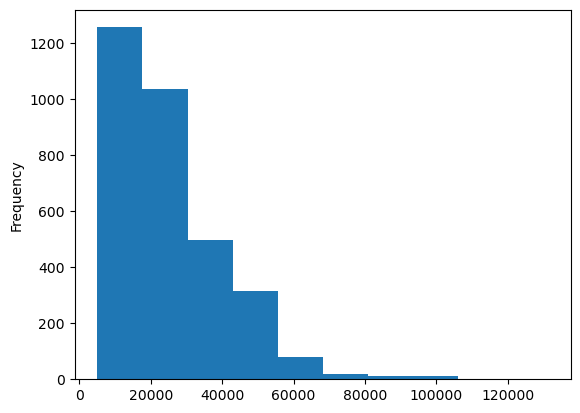

In [32]:
car_df.loc[car_df['manufacturer'] == 'HYUNDAI',:]['price'].plot(kind='hist')

## 4. 중고차 데이터 분석2

### 질문 1.
지난 실습에서 사용한 중고차 데이터를 계속 분석해 봅시다. 아래 그래프는 어떤 제조사의 중고차 가격 정보를 가지고 그린 것인지 고르세요. (직접 그래프를 그려서 비교해 보세요!)

In [33]:
car_df.head(3)

,manufacturer,category,fuel_type,engine_volume,mileage,price
0,HYUNDAI,Jeep,Petrol,2.0,36800,36065
1,TOYOTA,Sedan,Petrol,2.5,107000,15053
2,NISSAN,Jeep,Petrol,1.6,108222,7527


In [34]:
# 제조사 종류 살펴보기
car_df['manufacturer'].value_counts()

manufacturer
HYUNDAI          3229
TOYOTA           2563
MERCEDES-BENZ    1434
CHEVROLET         849
BMW               833
FORD              803
HONDA             738
LEXUS             539
NISSAN            472
VOLKSWAGEN        416
AUDI              143
Name: count, dtype: int64

- BMW

<Axes: ylabel='Frequency'>

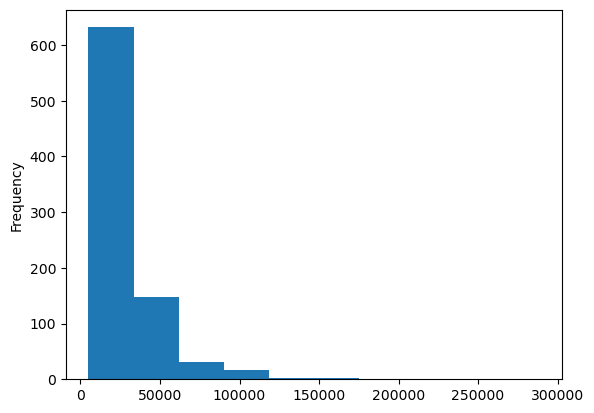

In [35]:
car_df.loc[car_df['manufacturer'] == 'BMW',:]['price'].plot(kind='hist')

- HYUNDAI

<Axes: ylabel='Frequency'>

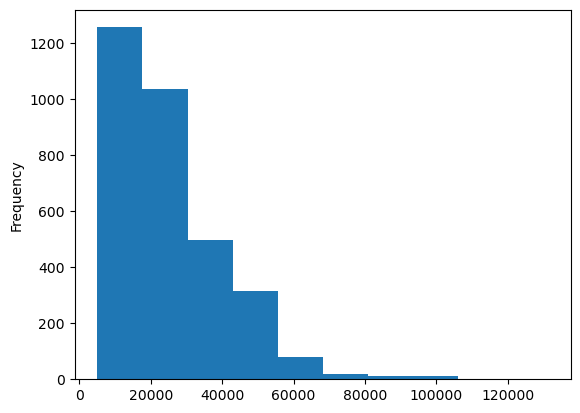

In [36]:
car_df.loc[car_df['manufacturer'] == 'HYUNDAI',:]['price'].plot(kind='hist')

- LEXUS

<Axes: ylabel='Frequency'>

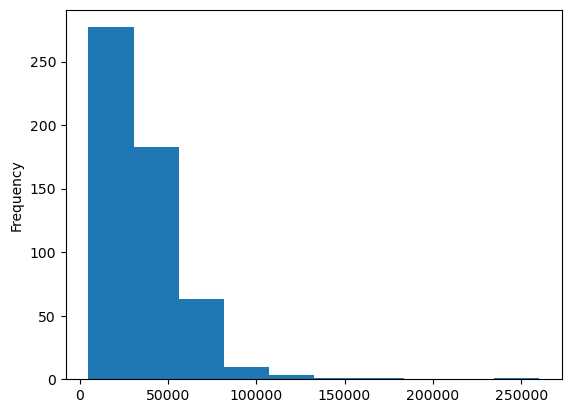

In [37]:
car_df.loc[car_df['manufacturer'] == 'LEXUS',:]['price'].plot(kind='hist')

- VOLKSWAGEN

<Axes: ylabel='Frequency'>

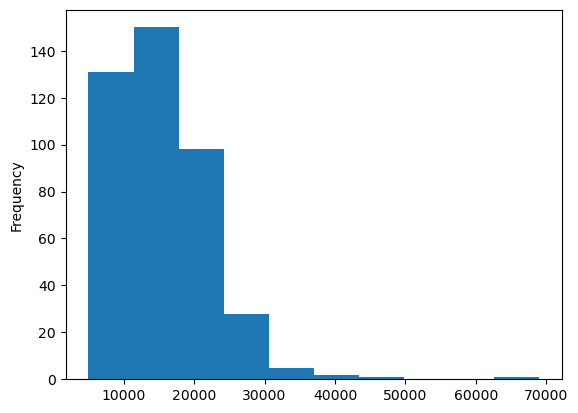

In [38]:
car_df.loc[car_df['manufacturer'] == 'VOLKSWAGEN',:]['price'].plot(kind='hist')

### 질문 2.
이전 문제에 있는 데이터를 다음과 같은 그래프로 표현할 수도 있습니다. 이렇게 부드러운 곡선 모양으로 전체 데이터의 확률 밀도 함수를 추측해서 그린 그래프를 무엇이라고 하는지 골라 주세요.

> KDE PLOT

## 5. 데이터 분포 퀴즈

### 질문 1.
다음 그래프는 A 학교와 B 학교 학생들의 몸무게 정보를 KDE Plot으로 나타낸 것입니다. 그래프를 잘못 해석한 것을 고르세요.

> 평균으로부터 퍼져있는 정도를 보면 분산의 크기를 알 수 있다!

### 질문 2.
아래 그래프는 지원이네 반에서 본 수학 쪽지 시험 결과를 히스토그램으로 나타낸 것입니다. 그래프를 잘못 해석한 것을 고르세요.

> positively-skewed, 양의 방향 오른쪽으로 꼬리거든, right-skewed
> 반대로 negatively-skewed, 음의 방향 왼쪽으로 꼬리, left-skewed

### 질문 3.
아래 그래프는 시애틀의 집값 데이터를 KDE Plot으로 나타낸 것입니다.(1만 달러 기준) 그래프를 올바르게 해석한 것을 고르세요.

> positvely-skewed가 왜도가 0보다 큰거고, 오른쪽으로 꼬리

### 질문 4.
민지네 가족 구성원들의 키를 가지고 분산을 계산해 보세요. 민지의 아버지는 177cm, 민지의 오빠는 183cm, 민지의 어머니는 160cm, 민지는 164cm 입니다.

- 이 경우는 pandas를 이용해 분산 X
    - 표본의 분산이 아니다!
    - 전수를 파악한 상황의 분산이므로, Numpy의 분산이 맞다.
    - 나눠주는 값이 n(numpy)이냐, n-1(pandas)이냐에 대한 이야기야.

In [45]:
import numpy as np

family_height_array = np.array([177, 183, 160, 164])

# 원시적으로 구해볼까?

## 1. 평균
family_height_array.mean()
## 2. 편차의 제곱의 합에 전체 요소의 수를 나누면, 분산
((family_height_array - family_height_array.mean())**2).sum() / len(family_height_array)


87.5

In [46]:
np.var(family_height_array)

87.5

In [47]:
 # n의 수가 적어(4)이므로, 표본 분산과 차이가 크다!
pd.Series([177, 183, 160, 164]).var()

116.66666666666667

> 이 경우는 4로 나누던걸 3으로 나누니, 차이가 크다!

## 6. 코드댓, 성공할 수 있을까?
> - 실습 설명
>
> 종훈이는 일주일 전에 '코드댓'이라는 코딩 교육 서비스를 런칭했습니다. 유저를 모으기 위해 지난 일주일 동안 지인들에게 열심히 홍보도 했고, 이제 유저가 얼마나 모였는지 확인해 보려고 합니다. user_df에는 세 개의 컬럼이 있는데, day는 서비스 오픈 후 경과일, register는 그 날 회원가입한 유저 수, unregister는 그 날 탈퇴한 유저 수입니다.
>
> 새로 가입한 유저 수와 탈퇴한 유저 수를 고려해서, 일별 누적 유저 수를 한눈에 확인할 수 있도록 net_user_cumsum이라는 컬럼을 만들어서 아래와 같은 막대 그래프를 그려 보세요! 채점을 위해 plt.show() 코드 없이 작성해 주세요!

In [16]:
import pandas as pd

user_df = pd.read_csv('../data-2/user.csv') # 일 별 회원가입/ 탈퇴 유저 수
user_df

,day,register,unregister
0,1,23,0
1,2,32,3
2,3,75,4
3,4,94,5
4,5,54,3
5,6,40,5
6,7,16,3


In [17]:
user_df['net_user'] = user_df['register'] - user_df['unregister']
user_df['net_user']

0    23
1    29
2    71
3    89
4    51
5    35
6    13
Name: net_user, dtype: int64

In [50]:
user_df['net_user_cumsum'] = user_df['net_user'].cumsum()
user_df

,day,register,unregister,net_user,net_user_cumsum
0,1,23,0,23,23
1,2,32,3,29,52
2,3,75,4,71,123
3,4,94,5,89,212
4,5,54,3,51,263
5,6,40,5,35,298
6,7,16,3,13,311


<Axes: xlabel='day'>

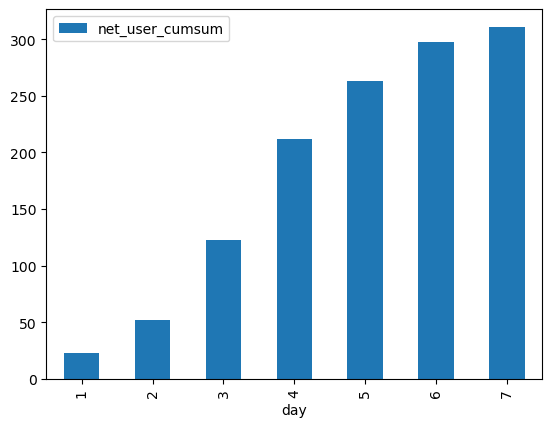

In [53]:
user_df.plot(x='day', y='net_user_cumsum', kind='bar')